In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

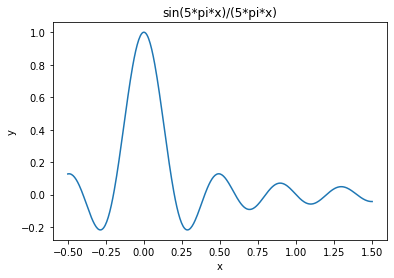

In [2]:
x = torch.linspace(-0.5,1.5,400).unsqueeze(1)
y = torch.sinc(5*x)

plt.plot(x, y)
plt.title('sin(5*pi*x)/(5*pi*x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1,5)
        self.fc2 = nn.Linear(5,10)
        self.fc3 = nn.Linear(10,10)
        self.fc4 = nn.Linear(10,10)
        self.fc5 = nn.Linear(10,10)
        self.fc6 = nn.Linear(10,10)
        self.fc7 = nn.Linear(10,5)
        self.pred = nn.Linear(5,1)
        
    def forward(self, x): 
        x = nn.functional.leaky_relu(self.fc1(x))
        x = nn.functional.leaky_relu(self.fc2(x))
        x = nn.functional.leaky_relu(self.fc3(x))
        x = nn.functional.leaky_relu(self.fc4(x))
        x = nn.functional.leaky_relu(self.fc5(x))
        x = nn.functional.leaky_relu(self.fc6(x))
        x = nn.functional.leaky_relu(self.fc7(x))
        x = self.pred(x)
        return x

In [4]:
M = Model()
criterion = nn.MSELoss()
optimizer = optim.Adam(M.parameters(), lr=0.001, weight_decay=1e-4)
Losses=[]
Grads = []


for i in range(5000):
    optimizer.zero_grad()
    output = M.forward(x)
    loss = criterion(output, y)
    loss=loss.float()
    loss.backward()
    optimizer.step()
    Losses.append(loss.item())
    
    grad_sum = 0.0
    for k in M.parameters():
        grad =0
        if k.grad is not None:
            grad = (k.grad.cpu().data.numpy() ** 2).sum()
        grad_sum += grad
    grad_norm = grad_sum**0.5
    Grads.append(grad_norm) 
    

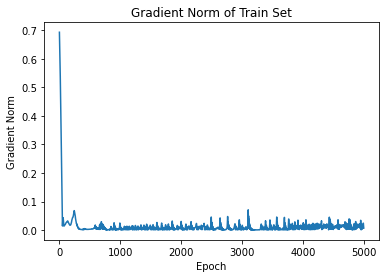

In [5]:
plt.plot(np.arange(0,5000), Grads)
plt.title('Gradient Norm of Train Set')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

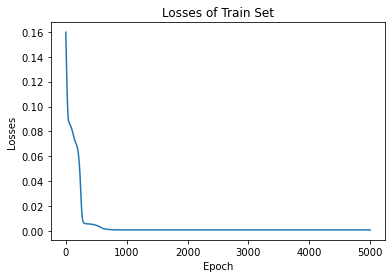

In [6]:
plt.plot(np.arange(0,5000), Losses)
plt.title('Losses of Train Set')
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()